## **Indian Startup Funding** Analysis using (Pandas)

This dataset contains funding details of Indian Startups (2016-2020). It covers information about startups, funding rounds, investors, and other related metrics.



In [ ]:
import pandas as pd
import numpy as np

Data collection: I collected this dataset from kaggle.

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Project/startup_funding.csv")

Understanding the data.

In [ ]:
df.info()
# This dataset has 3044 rows and 10 columns.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [ ]:
df.describe() # before data cleaning there is only one numerical column.
df.head()
df.tail()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
3039,3040,29-01-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29-01-2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30-01-2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30-01-2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
3043,3044,31-01-2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"1,40,000",NaN


In [ ]:
df.columns
# column names:- Sr No, Date, Startup Name, Industry Vertical, SubVertical, City Location Investors Name, INvestmentntype, Amount in USD, Remarks

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [ ]:
df.dtypes

,0
Sr No,int64
Date dd/mm/yyyy,object
Startup Name,object
Industry Vertical,object
SubVertical,object
City Location,object
Investors Name,object
InvestmentnType,object
Amount in USD,object
Remarks,object


In [ ]:
df.shape
rows=df.shape[0]
columns=df.shape[1]
print(f"Rows:-{rows} in total and Columns:-{columns} in total")

Rows:-3044 in total and Columns:-10 in total


Data cleaning.

In [ ]:
df.isna().sum()
df.duplicated().sum()

0

In [ ]:
df.drop(columns=['Sr No','Remarks'],inplace=True) # dropping unnecessary columns

In [ ]:
# Renaming column names
df.rename(columns={
    'Date dd/mm/yyyy':'Date',
    'Startup Name':'startups',
    'Industry Vertical':'vertical',
    'SubVertical':'subvertical',
    'City  Location':'location',
    'Investors Name':'investor',
    'Amount in USD':'amount',
    'InvestmentnType':'investment round'
},inplace=True)

In [ ]:
df.columns

Index(['Date', 'startups', 'vertical', 'subvertical', 'location', 'investor',
       'investment round', 'amount'],
      dtype='object')

In [ ]:
df.isna().sum()# There is a total of 7 columns having null values.

,0
Date,0
startups,0
vertical,171
subvertical,936
location,180
investor,24
investment round,4
amount,960


In [ ]:
df.duplicated().sum() # checkinng duplicate values

0

In [ ]:
df["amount"]=df["amount"].fillna("0")# filling null values to 0



In [ ]:
df["amount"].unique()

array(['20,00,00,000', '80,48,394', '1,83,58,860', '30,00,000',
       '18,00,000', '90,00,000', '15,00,00,000', '60,00,000',
       '7,00,00,000', '5,00,00,000', '2,00,00,000', '1,20,00,000',
       '3,00,00,000', '59,00,000', '20,00,000', '23,10,00,000',
       '4,86,000', '15,00,000', 'undisclosed', '2,60,00,000',
       '1,74,11,265', '13,00,000', '13,50,00,000', '3,00,000',
       '22,00,00,000', '1,58,00,000', '28,30,00,000', '1,00,00,00,000',
       '4,50,00,000', '58,50,00,000', 'unknown', '45,00,000', '33,00,000',
       '50,00,000', '1,80,00,000', '10,00,000', '1,00,00,000',
       '45,00,00,000', '16,00,000', '14,00,00,000', '3,80,80,000',
       '12,50,00,000', '1,10,00,000', '5,10,00,000', '3,70,00,000',
       '5,00,000', '11,00,00,000', '1,50,00,000', '65,90,000',
       'Undisclosed', '3,90,00,00,000', '1,90,00,000', '25,00,000',
       '1,45,000', '6,00,00,000', '1,60,00,000', '57,50,000', '3,19,605',
       '48,89,975.54', '7,50,00,000', '27,39,034.68', '1,51,09,500.0

In [ ]:
df['amount']=df['amount'].str.replace(',','')
df['amount']=df['amount'].str.replace('undisclosed','0')
df['amount']=df['amount'].str.replace('unknown','0')
df['amount']=df['amount'].str.replace('Undisclosed','0')

In [ ]:
df=df[df['amount'].str.isdigit()]

In [ ]:
df["amount"]=df['amount'].astype("float") # Changed the data type of "amount" column to float.

In [ ]:
df.dtypes

,0
Date,object
startups,object
vertical,object
subvertical,object
location,object
investor,object
investment round,object
amount,float64


In [ ]:
df["amount"]

,amount
0,200000000.0
1,8048394.0
2,18358860.0
3,3000000.0
4,1800000.0
...,...
3039,4500000.0
3040,825000.0
3041,1500000.0
3042,0.0


In [ ]:
df["Date"].unique()

array(['09-01-2020', '13-01-2020', '02-01-2020', ..., '29-01-2015',
       '30-01-2015', '31-01-2015'], dtype=object)

In [ ]:
df['Date']=df['Date'].str.replace('05/072018','05/07/2018')
df['Date']=df['Date'].str.replace('15-01-07 00:00:00','15/01/07')

In [ ]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [ ]:
# dropping null value
df.dropna(subset=['Date','location','subvertical',
                  'vertical','investor',
                  'investment round'],inplace=True)



In [ ]:
df.isna().sum()

,0
Date,0
startups,0
vertical,0
subvertical,0
location,0
investor,0
investment round,0
amount,0


In [ ]:
df

,Date,startups,vertical,subvertical,location,investor,investment round,amount
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0
6,2020-10-01,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,150000000.0
...,...,...,...,...,...,...,...,...
2035,2016-11-01,Fashionablyin,Consumer Internet,Mobile based Geo-target Fashion Marketplace,Mumbai,Ranjan Mahtani,Seed Funding,0.0
2036,2016-12-01,Shopclues,ECommerce,ECommerce Marketplace,Gurgaon,"GIC, Tiger Global Management, Nexus Venture Pa...",Private Equity,100000000.0
2037,2016-12-01,Hike Messenger,Consumer Internet,P2P Messaging Service,New Delhi,"Matt Mullenweg, Adam D\\xe2\\x80\\x99Angelo, A...",Private Equity,0.0
2038,2016-12-01,iBus Networks,Technology,Next Generation in-building connectivity,Bangalore,"Vallabh Bhanshali, N Squared Management LLC, J...",Private Equity,2300000.0


In [ ]:
df.reset_index(drop=True)

,Date,startups,vertical,subvertical,location,investor,investment round,amount
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
2,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
3,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0
4,2020-10-01,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,150000000.0
...,...,...,...,...,...,...,...,...
885,2016-11-01,Fashionablyin,Consumer Internet,Mobile based Geo-target Fashion Marketplace,Mumbai,Ranjan Mahtani,Seed Funding,0.0
886,2016-12-01,Shopclues,ECommerce,ECommerce Marketplace,Gurgaon,"GIC, Tiger Global Management, Nexus Venture Pa...",Private Equity,100000000.0
887,2016-12-01,Hike Messenger,Consumer Internet,P2P Messaging Service,New Delhi,"Matt Mullenweg, Adam D\\xe2\\x80\\x99Angelo, A...",Private Equity,0.0
888,2016-12-01,iBus Networks,Technology,Next Generation in-building connectivity,Bangalore,"Vallabh Bhanshali, N Squared Management LLC, J...",Private Equity,2300000.0


# **Analysis**

Top 10 fund raised companies.

In [ ]:
funds_overview=df.groupby("startups")["amount"].sum()
funds_overview=funds_overview[funds_overview>0]

In [ ]:
funds_overview

,amount
startups,
"""BYJU\\'S""",150000000.0
19th mile,180000.0
360Ride,150000.0
3HCare,100000.0
3rdFlix,5000000.0
...,...
imedilane,40000.0
medECUBE,4000000.0
quizizz,3000000.0


In [ ]:

top10_companies=funds_overview.sort_values(ascending=False).head(10)
top10_companies=pd.DataFrame(top10_companies)
top10_companies=top10_companies.reset_index()
top10_companies


,startups,amount
0,Flipkart,2.500000e+09
1,Udaan,8.100000e+08
2,GOQii,4.500000e+08
3,Ola,4.345000e+08
4,Zomato,3.500000e+08
5,BigBasket,3.000000e+08
6,OYO Rooms,2.500000e+08
7,Zilingo,2.340000e+08
8,CarDekho,2.000000e+08
9,Paytm Marketplace,2.000000e+08


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

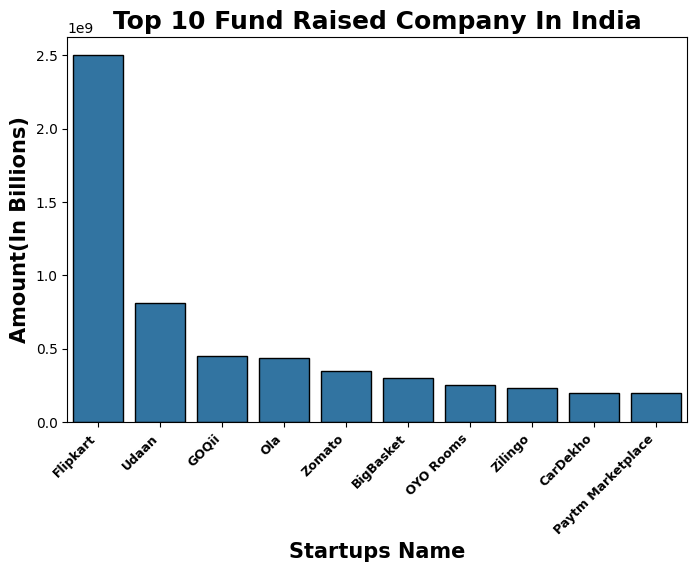

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='startups',y='amount',data=top10_companies,edgecolor='black')
plt.title('Top 10 Fund Raised Company In India',fontsize=18,weight='bold')
plt.xlabel('Startups Name',fontsize=15,weight='bold')
plt.ylabel('Amount(In Billions)',fontsize=15,weight='bold')
plt.xticks(rotation=45,ha='right',fontsize=9,weight='bold')
plt.show()

Top 10 E-commerce companies

In [ ]:
df['vertical'].unique()

array(['E-Tech', 'E-commerce', 'FinTech', 'Fashion and Apparel',
       'Hospitality', 'Technology', 'E-Commerce', 'Aerospace', 'Gaming',
       'Video Games', 'Last Mile Transportation', 'Customer Service',
       'B2B', 'Advertising, Marketing', 'SaaS', 'IoT',
       'Information Technology', 'Consumer Technology',
       'Health and Wellness', 'Accounting', 'Finance', 'Compliance',
       'Transport', 'Artificial Intelligence', 'Food and Beverage',
       'EdTech', 'Tech', 'Health Care', 'Luxury Label',
       'Waste Management Service', 'Deep-Tech', 'Energy', 'Digital Media',
       'Transportation', 'Services', 'Saas', 'Fintech', 'Edtech', 'AI',
       'Ecommerce', 'Automobile', 'Social Media', 'Services Platform',
       'Travel Tech', 'Online Education', 'Online Marketplace',
       'SaaS, Ecommerce', 'NBFC', 'Food', 'Food Tech', 'Fashion',
       'Logistics', 'Real Estate', 'Logistics Tech', 'Consumer Internet',
       'B2B Platform', 'Healthcare', 'Fin-Tech', 'Food-Tech', 'Ed-

In [ ]:
df['vertical']=df['vertical'].str.replace('E-Commerce','E-commerce')
df['vertical']=df['vertical'].str.replace('Ecommerce','E-commerce')
df['vertical']=df['vertical'].str.replace('ECommerce','E-commerce')
df['vertical']=df['vertical'].str.replace('eCommerce','E-commerce')
df['vertical']=df['vertical'].str.replace('eCommece','E-commerce')

In [ ]:
E_commerce=df[df["vertical"]=="E-commerce"][["startups","amount"]]
E_commerce=E_commerce[E_commerce["amount"]>0]
top10_E_commerce_company=E_commerce.sort_values(by="amount",ascending=False).head(10)

In [ ]:
top10_E_commerce_company=top10_E_commerce_company.groupby("startups")["amount"].sum()

In [ ]:
top10_E_commerce_company=pd.DataFrame(top10_E_commerce_company).sort_values(by="amount",ascending=False).head(10).reset_index()

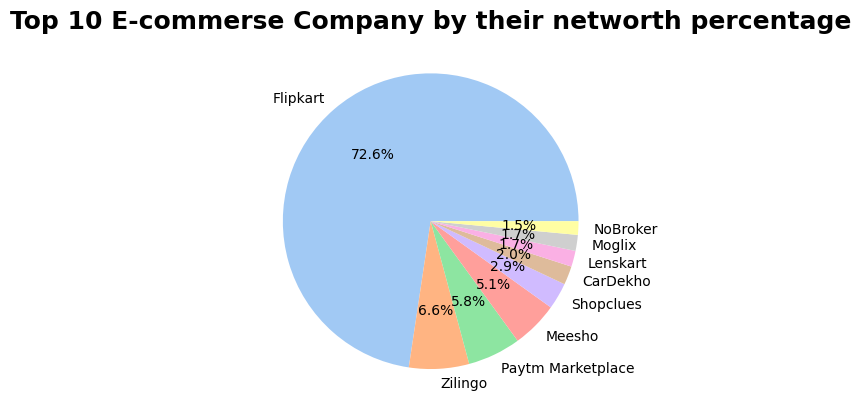

In [ ]:
# plt.figure(figsize=())
plt.pie(top10_E_commerce_company['amount'], labels=top10_E_commerce_company['startups'], autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title('Top 10 E-commerse Company by their networth percentage', fontsize=18, weight='bold')
plt.show()

Flipkart tops the list with 72.6%, Zilingo is in second place, and Paytm is in third place.

Top 5 startup friendly locations in India.

In [ ]:
df["location"].unique()

array(['Bengaluru', 'New Delhi', 'Mumbai', 'Gurgaon', 'Pune', 'Noida',
       'Amritsar', 'Hyderabad', 'Burnsville', 'Menlo Park', 'Singapore',
       'Kormangala', 'Taramani', 'Andheri', 'Chembur', 'Haryana',
       'New York', 'Karnataka', 'Mumbai/Bengaluru', 'Delhi', 'Bhopal',
       'Gurugram', 'India/Singapore', 'Jaipur', 'India/US', 'Chennai',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'Rourkela', 'Srinagar',
       'Bhubneswar', 'Coimbatore', 'Bangalore', 'Faridabad', 'Ahemdabad',
       'Bhubaneswar', 'Ahmedabad', 'Surat', 'Goa', 'Nw Delhi', 'Kolkata',
       'Trivandrum', 'Vadodara', 'Panaji', 'Udupi', 'Kochi',
       'Bangalore/ Bangkok', 'Hubli', 'Kerala', 'US', 'Chandigarh',
       'Siliguri', 'Lucknow', 'Kanpur', 'SFO / Bangalore', 'London',
       'Seattle / Bangalore', 'Pune/Seattle', 'Pune / Dubai',
       'Bangalore / SFO', 'Varanasi'], dtype=object)

In [ ]:
df['location']=df['location'].str.replace('Bengaluru','Bangalore')
df['vertical']=df['vertical'].str.replace('Bengaluru and Gurugram','Bangalore')
df['vertical']=df['vertical'].str.replace('New York, Bengaluru','Bangalore')
df['vertical']=df['vertical'].str.replace('Bangalore/ Bangkok','Bangalore')
df['vertical']=df['vertical'].str.replace('SFO / Bangalore','Bangalore')
df['location']=df['location'].str.replace('Seattle / Bangalore','Bangalore')
df['vertical']=df['vertical'].str.replace('Bangalore / SFO','Bangalore')
df['vertical']=df['vertical'].str.replace('Mumbai/Bengaluru','Mumbai')
df['vertical']=df['vertical'].str.replace('Mumbai / UK','Mumbai')
df['vertical']=df['vertical'].str.replace('New Delhi / US','New Delhi')
df['vertical']=df['vertical'].str.replace('Pune / Dubai','Pune')
df['vertical']=df['vertical'].str.replace('Pune/Seattle','Pune')

In [ ]:
top_investment = df['investment round'].value_counts().head(10)
top_investment

,count
investment round,
Private Equity,388
Seed Funding,362
Seed/ Angel Funding,23
Series A,16
Seed / Angel Funding,15
Debt Funding,13
Series D,10
Series C,8
Series B,8


In [ ]:
top5_loc=df["location"].value_counts().head(5)

In [ ]:
top5_loc

,count
location,
Bangalore,256
Mumbai,171
New Delhi,119
Gurgaon,85
Pune,40


<ipython-input-44-119459a24aa5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top5_loc,x=top5_loc.index,palette=


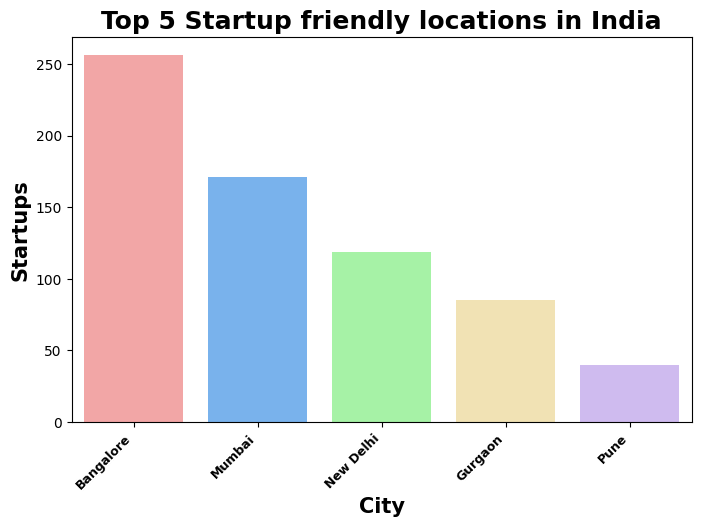

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(y=top5_loc,x=top5_loc.index,palette=
            ['#FF9999', '#66B2FF', '#99FF99','#fbe7aa','#cdb2f8'])
plt.title('Top 5 Startup friendly locations in India',fontsize=18,weight='bold')
plt.xlabel('City',fontsize=15,weight='bold')
plt.ylabel('Startups',fontsize=15,weight='bold')
plt.xticks(rotation=45,ha='right',fontsize=9,weight='bold')

plt.show()

Top 5 startup investors in India.

In [ ]:
top5_investors=df.groupby("investor")["amount"].sum().reset_index().sort_values(by="amount",ascending=False).head(5)

In [ ]:
top5_investors

,investor,amount
623,Softbank,2.500000e+09
45,"Altimeter Capital, DST Global",5.850000e+08
104,Bennett Coleman and Company Ltd (BCCL),4.500000e+08
621,SoftBank Group Corp,3.300000e+08
40,"Alibaba, Helion Venture Partners, Bessemer Ven...",3.000000e+08


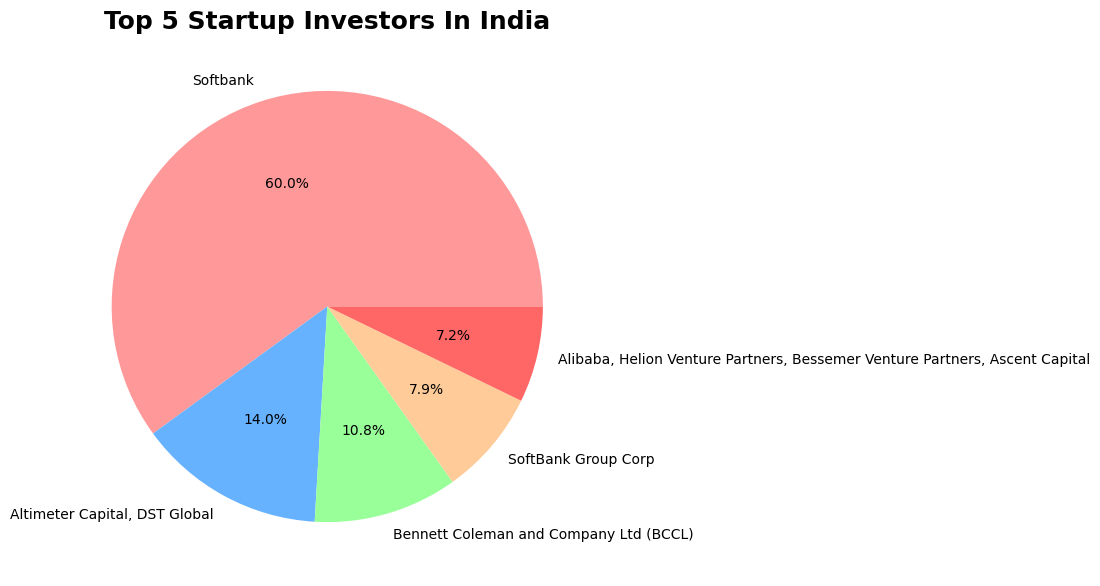

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(top5_investors['amount'], labels=top5_investors['investor'], autopct='%1.1f%%',
        colors= ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF6666'])
plt.title('Top 5 Startup Investors In India', fontsize=18, weight='bold')
plt.show()

<ipython-input-48-fb0215a8dd15>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_investors.values, x=top_investors.index, palette='copper')


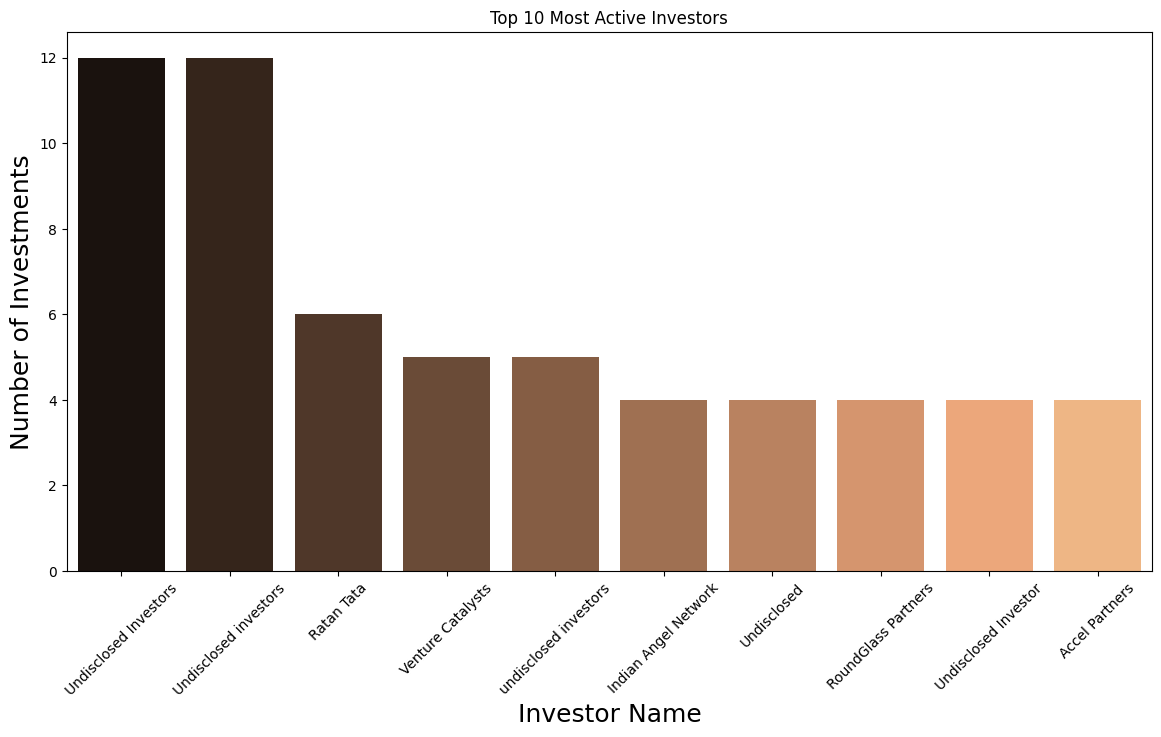

In [ ]:
# Top investors in India
top_investors = df['investor'].value_counts().head(10)
plt.figure(figsize=(14, 7))
sns.barplot(y=top_investors.values, x=top_investors.index, palette='copper')
plt.title('Top 10 Most Active Investors')
plt.ylabel('Number of Investments',fontsize=18)
plt.xlabel('Investor Name', fontsize=18)
plt.xticks(rotation=45)
plt.show()

flipkart's investors

In [ ]:
flipkart=df[df["startups"]=="Flipkart"][["investor","amount"]]
flipkart
# soft bank group is the only investor of flipkart. (2.5 billion dollers)

,investor,amount
651,Softbank,2.500000e+09


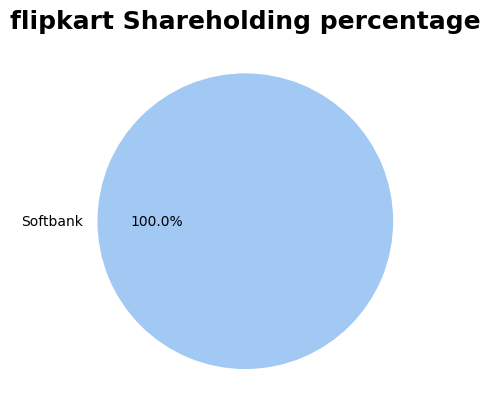

In [ ]:

plt.pie(flipkart['amount'], labels=flipkart['investor'], autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title('flipkart Shareholding percentage', fontsize=18, weight='bold')
plt.show()

Paytm share holding groups

In [ ]:
Paytm=df[df["startups"]=="Paytm Marketplace"][["investor","amount"]]
Paytm
# alibaba group is the only share holder of paytm ()

,investor,amount
938,Alibaba,200000000.0


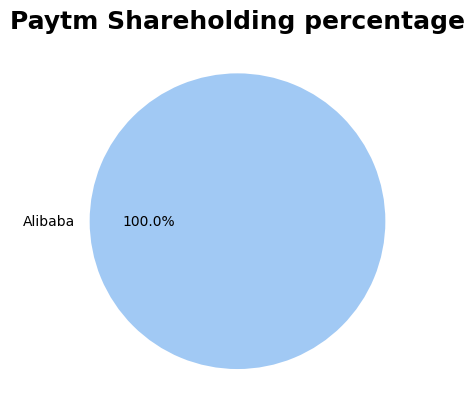

In [ ]:

plt.pie(Paytm['amount'], labels=Paytm['investor'], autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title('Paytm Shareholding percentage', fontsize=18, weight='bold')
plt.show()

Healthcare marketcap acquisition by startups.

In [ ]:
df["vertical"].unique()

array(['E-Tech', 'E-commerce', 'FinTech', 'Fashion and Apparel',
       'Hospitality', 'Technology', 'Aerospace', 'Gaming', 'Video Games',
       'Last Mile Transportation', 'Customer Service', 'B2B',
       'Advertising, Marketing', 'SaaS', 'IoT', 'Information Technology',
       'Consumer Technology', 'Health and Wellness', 'Accounting',
       'Finance', 'Compliance', 'Transport', 'Artificial Intelligence',
       'Food and Beverage', 'EdTech', 'Tech', 'Health Care',
       'Luxury Label', 'Waste Management Service', 'Deep-Tech', 'Energy',
       'Digital Media', 'Transportation', 'Services', 'Saas', 'Fintech',
       'Edtech', 'AI', 'Automobile', 'Social Media', 'Services Platform',
       'Travel Tech', 'Online Education', 'Online Marketplace',
       'SaaS, E-commerce', 'NBFC', 'Food', 'Food Tech', 'Fashion',
       'Logistics', 'Real Estate', 'Logistics Tech', 'Consumer Internet',
       'B2B Platform', 'Healthcare', 'Fin-Tech', 'Food-Tech', 'Ed-Tech',
       'IT', 'Fiinance', '

In [ ]:
df['vertical']=df['vertical'].str.replace('Health and wellness','healthcare')
df['vertical']=df['vertical'].str.replace('Health and Wellness','healthcare')
df['vertical']=df['vertical'].str.replace('Healthcare','healthcare')
df['vertical']=df['vertical'].str.replace('Health Care','healthcare')

In [ ]:
Healthcare=df[df["vertical"] == "healthcare"][['startups',"amount"]]
Healthcare=Healthcare[Healthcare['amount'] > 0]
top10_Healthcare_company=Healthcare.sort_values(by="amount",ascending=False).head(10)

In [ ]:
top10_Healthcare_company

,startups,amount
42,GOQii,450000000.0
358,Shape,100000000.0
856,Healthcare at Home,40000000.0
117,Vyome Therapeutics Inc.,22000000.0
353,Asia Institute Of Medical Science,21000000.0
868,Medwell Ventures,21000000.0
939,iGenetics,19500000.0
360,healthifyme,12000000.0
321,MedGenome,10000000.0
582,OncoStem,6000000.0


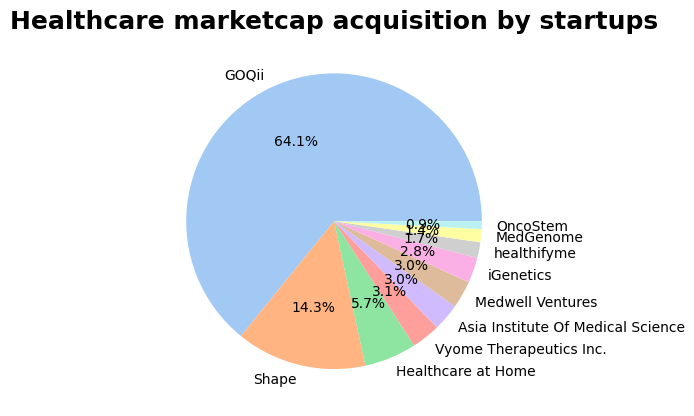

In [ ]:

plt.pie(top10_Healthcare_company['amount'], labels=top10_Healthcare_company['startups'], autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title('Healthcare marketcap acquisition by startups', fontsize=18, weight='bold')
plt.show()

Top 5 markets most liked by investors.

In [ ]:
investors_interest=df.groupby("vertical")["startups"].size().reset_index(name="number_of_startups").sort_values(by="number_of_startups",ascending=False).head(5)

In [ ]:
investors_interest

,vertical,number_of_startups
10,Consumer Internet,364
58,Technology,198
16,E-commerce,131
65,healthcare,36
28,Finance,26


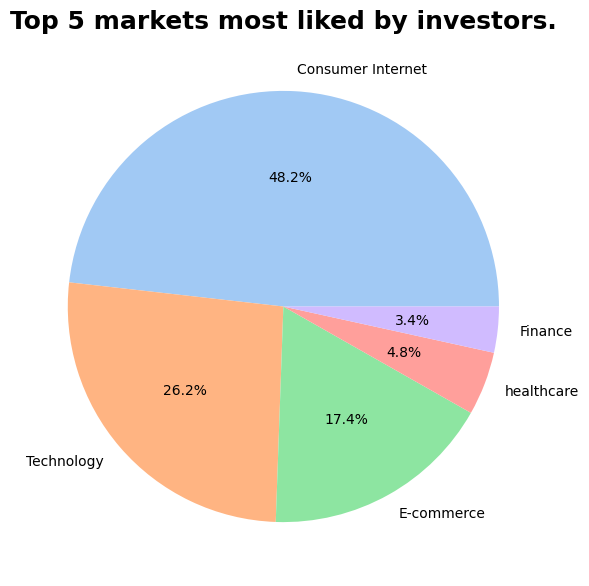

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(investors_interest['number_of_startups'], labels=investors_interest['vertical'], autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title('Top 5 markets most liked by investors.', fontsize=18, weight='bold')
plt.show()

In [ ]:
# Extract year and month for time-based analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

<ipython-input-62-9db47c25e4fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=funding_per_year.index, y=funding_per_year.values, palette='pastel')


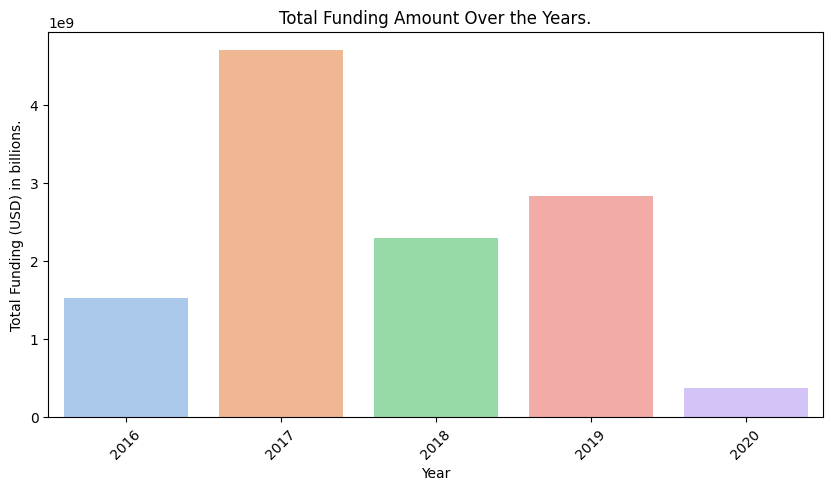

In [ ]:
funding_per_year = df.groupby('Year')['amount'].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x=funding_per_year.index, y=funding_per_year.values, palette='pastel')
plt.title('Total Funding Amount Over the Years.')
plt.xlabel('Year')
plt.ylabel('Total Funding (USD) in billions.')
plt.xticks(rotation=45)
plt.show()

As per time based analysis, highest funding is on 2017 and lowest is on 2020.

<ipython-input-63-f952b65a9907>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sectors.index, y=top_sectors.values, palette='pastel')


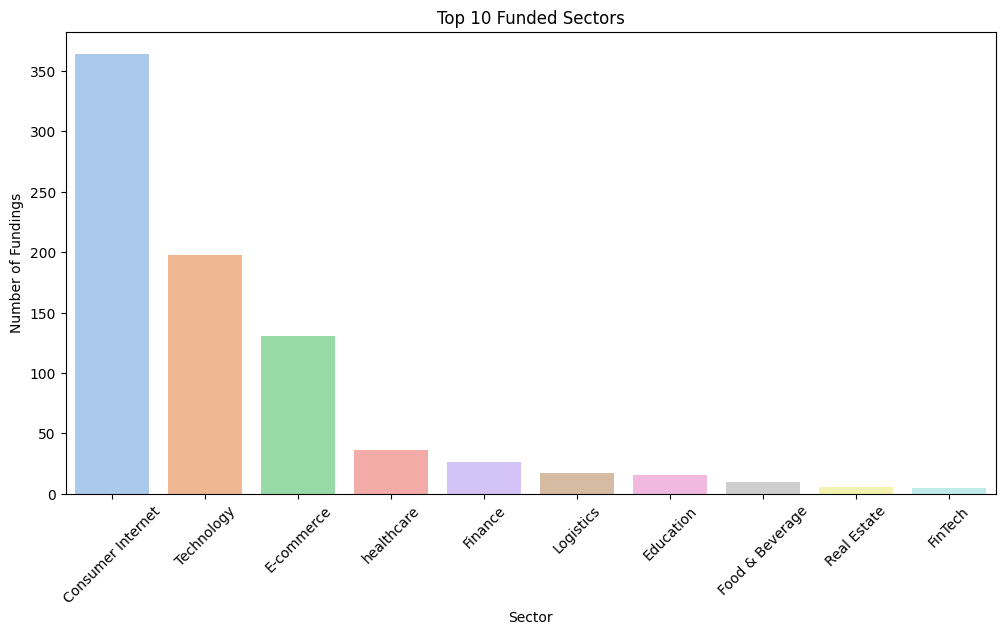

In [ ]:
# Most funded sectors
top_sectors = df['vertical'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sectors.index, y=top_sectors.values, palette='pastel')
plt.title('Top 10 Funded Sectors')
plt.xlabel('Sector')
plt.ylabel('Number of Fundings')
plt.xticks(rotation=45)
plt.show()


As per this barplot analysis (internet consumer) is at the top and (Fin Tech) is on the bottom.

In [ ]:
df

,Date,startups,vertical,subvertical,location,investor,investment round,amount,Year,Month
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,200000000.0,2020,9
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860.0,2020,9
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,2020,2
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,2020,2
6,2020-10-01,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,150000000.0,2020,10
...,...,...,...,...,...,...,...,...,...,...
2035,2016-11-01,Fashionablyin,Consumer Internet,Mobile based Geo-target Fashion Marketplace,Mumbai,Ranjan Mahtani,Seed Funding,0.0,2016,11
2036,2016-12-01,Shopclues,E-commerce,ECommerce Marketplace,Gurgaon,"GIC, Tiger Global Management, Nexus Venture Pa...",Private Equity,100000000.0,2016,12
2037,2016-12-01,Hike Messenger,Consumer Internet,P2P Messaging Service,New Delhi,"Matt Mullenweg, Adam D\\xe2\\x80\\x99Angelo, A...",Private Equity,0.0,2016,12
2038,2016-12-01,iBus Networks,Technology,Next Generation in-building connectivity,Bangalore,"Vallabh Bhanshali, N Squared Management LLC, J...",Private Equity,2300000.0,2016,12


<function matplotlib.pyplot.show(close=None, block=None)>

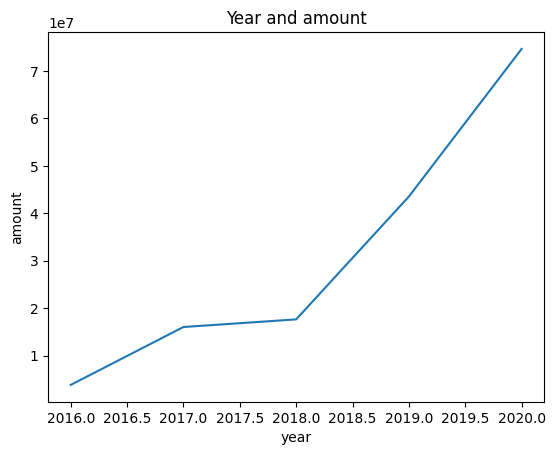

In [ ]:
# time series analysis
var1=df[["Year","amount"]].groupby("Year").mean()
plt.plot(var1.index,var1)
plt.title("Year and amount")
plt.xlabel("year")
plt.ylabel("amount")
plt.show

As per my analysis when it's comes to startups Flipkart is the top growing company and it's 100% share holder is "soft bank" group. And flipkart is an E-commerce platform. But (Internet consumer) is the